
# Decision Tree

Can be used to solve classification and regression problems. Has a tree-like structure, with each node denotes a test on an attribute, and each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.



## Entropy

Entropy is the measure of the randomness in the information being processed. The higher the entropy, the harder it is to draw any conclusions from that information. Therefore, lower entropy is preferred.


$H(X) = - \Sigma_{\text{i=1}}^nP(x_i)log_bP(x_i)$

## Information Gain

Information gain is the amount of information gained about a random variable or signal from observing another random variable. It is considered as the difference between the entropy of parent node and weighted average entropy of child nodes.

$IG(S, A) = H(S) - H(S, A)$

Alternatively:

$IG(S, A) = H(S) - \Sigma^n_{i=0}P(x)*H(x)$

## Gini Impurity

Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the dataset.

$Gini(E) = 1 - \Sigma^c_{j=1}p^2_j$

Gini impurity is lower bounded by 0, with 0 occuring if the dataset contains only one class.

## Algorithms

There are many algorithms to build a decision tree:
    
- __CART__ (Classification and Regression Trees) - This makes use of Gini impurity as metric.
- __ID3__ (Iterative Dichotomiser 3) - This uses entropy and information gain as metric.

In [32]:
%matplotlib inline

import numpy as np
import math
import unittest
from collections import Counter

import matplotlib.pyplot as plt

In [49]:
def gini(t, f=0):
    if t == 0 or f == 0: return 0
    n = t + f
    fn = lambda p: p ** 2
    return 1 - fn(t / n) - fn(f / n)

In [34]:
def entropy(t, f):
    if t == 0 or f == 0: return 0
    n = t + f
    fn = lambda p: -p * math.log2(p)
    return fn(t / n) + fn(f / n)

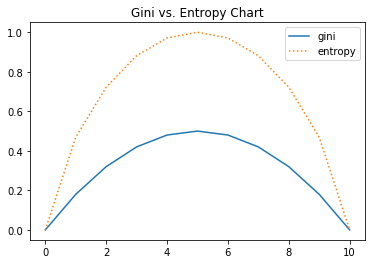

In [47]:
X = list(range(11))
y_gini = [gini(X_i, 10 - X_i) 
          for X_i in X]
y_entropy = [entropy(X_i, 10 - X_i) 
             for X_i in X]

plt.plot(X, y_gini, linestyle='-', label='gini')
plt.plot(X, y_entropy, linestyle=':', label='entropy')
plt.title('Gini vs. Entropy Chart')
plt.legend()

In [3]:
data = np.array([
    [4.8, 3.4, 1.9, 0.2, True],
    [5.0, 3.0, 1.6, 0.2, True],
    [5.0, 3.4, 1.6, 0.4, True],
    [5.2, 3.5, 1.5, 0.2, True],
    [5.2, 3.4, 1.4, 0.2, True],
    [4.7, 3.2, 1.6, 0.2, True],
    [4.8, 3.1, 1.6, 0.2, True],
    [5.4, 3.4, 1.5, 0.4, True],
    [7.0, 3.2, 4.7, 1.4, False],
    [6.4, 3.2, 4.5, 1.5, False],
    [6.9, 3.1, 4.9, 1.5, False],
    [5.5, 2.3, 4.0, 1.3, False],
    [6.5, 2.8, 4.6, 1.5, False],
    [5.7, 2.8, 4.5, 1.3, False],
    [6.3, 3.3, 4.7, 1.6, False],
    [4.9, 2.4, 3.3, 1.0, False]
])
len(data)

16

In [5]:
t, f = Counter(data[:, -1]).values()
target_entropy = entropy(t, f)
target_entropy

1.0

In [9]:
# Functions to select the values from the dataset.

def target_a(n):
    return 1 if n >= 5 else 0

def target_b(n):
    return 1 if n >= 3 else 0

def target_c(n):
    return 1 if n >= 4.2 else 0

def target_d(n):
    return 1 if n >= 1.4 else 0

In [13]:
# Normalize it.
dataset = np.array([[target_a(a), target_b(b), target_c(c), target_d(d), e] for [a,b,c,d,e] in data])
dataset

array([[0., 1., 0., 0., 1.],
       [1., 1., 0., 0., 1.],
       [1., 1., 0., 0., 1.],
       [1., 1., 0., 0., 1.],
       [1., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 1., 0., 0., 1.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 1., 1., 0.],
       [1., 0., 1., 0., 0.],
       [1., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0.]])

In [18]:
gte_five, lt_five = dataset[dataset[:, 0] == 1], dataset[dataset[:, 0] == 0]
left, right = gte_five[gte_five[:, -1] == True], gte_five[gte_five[:, -1] == False]
l, r = len(left), len(right)
l, r, entropy(l, r)

(5, 7, 0.9798687566511528)

In [20]:
left, right = lt_five[lt_five[:, -1] == True], lt_five[lt_five[:, -1] == False]
l, r = len(left), len(right)
l, r, entropy(l, r)

(3, 1, 0.8112781244591328)

In [15]:
class TestDecisionTree(unittest.TestCase):
    def test_entropy(self):
        self.assertEqual(0, entropy(0, 5)) # Homogenous (only one class).
        self.assertEqual(0, entropy(5, 0)) 
        self.assertEqual(1, entropy(5, 5)) # Equal distribution.

if __name__ == '__main__':
    unittest.main(argv=['exclude-first-argument'], exit=False)

.
----------------------------------------------------------------------
Ran 1 test in 0.006s

OK
